Import depedencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [27]:
# creating dataset with 100 customers, we are creating dummy customers data.
import random

np.random.seed(42)

data = {
    'CustomerID': np.arange(1,501),
    'Age': np.random.randint(18,70, size = 500),
    'Average_Spend': np.random.uniform(1,7,size =500),
    'Visits_per_week':np.random.uniform(1,7, size = 500),
    'Promotion_Interest':np.random.randint(1,11,size=500)


}




In [28]:
# convert this data into DataFrame.

df = pd.DataFrame(data)

df.head()

,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_Interest
0,1,56,6.729192,4.224374,7
1,2,69,5.427382,6.519134,4
2,3,46,4.326124,3.078076,8
3,4,32,4.670324,3.081719,7
4,5,60,3.517600,5.425007,5


In [29]:
df.columns

Index(['CustomerID', 'Age', 'Average_Spend', 'Visits_per_week',
       'Promotion_Interest'],
      dtype='object')

### Apply KMeans clustering to segment customers into 3 groups

### Find Cluster Number

In [30]:
# # Prepare the data for clustering
X = df[['Age', 'Average_Spend', 'Visits_per_week',
       'Promotion_Interest' ]]
# use Elbow method to find the optimal number of clusters.

wcss = []
for k in range(1,11):
  kmeans= KMeans(n_clusters=k, init = "k-means++", random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)




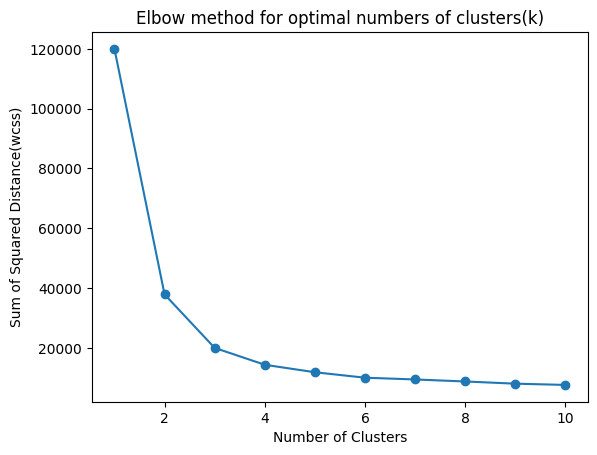

In [31]:
# plot the  elbow curve of dataset.

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance(wcss)')
plt.title('Elbow method for optimal numbers of clusters(k)')

plt.show()



Optimum Number of Clusters = 3

Training the k-Means Clustering Model

In [32]:
# We are clustering based on 'Age', 'Average_Spend', 'Visits_per_Week', and 'Promotion_Interest'
features = df[['Age', 'Average_Spend', 'Visits_per_week', 'Promotion_Interest']]

# initialize KMeans with 3 clusters
kmeans =  KMeans(n_clusters=3, init = "k-means++", random_state=42)

# fit the model

df['Cluster'] = kmeans.fit_predict(features)

# Rename clusters to 'Daily', 'Promotion', 'Weekend'.

cluster_names = {0 : 'Daily', 1: 'Promotion', 2:'Weekend'}

df['Customer Group'] = df['Cluster'].map(cluster_names)


df.head()



,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_Interest,Cluster,Customer Group
0,1,56,6.729192,4.224374,7,2,Weekend
1,2,69,5.427382,6.519134,4,2,Weekend
2,3,46,4.326124,3.078076,8,0,Daily
3,4,32,4.670324,3.081719,7,1,Promotion
4,5,60,3.517600,5.425007,5,2,Weekend


 Visualize the clusters using Age and Average Spend (2D Plot)

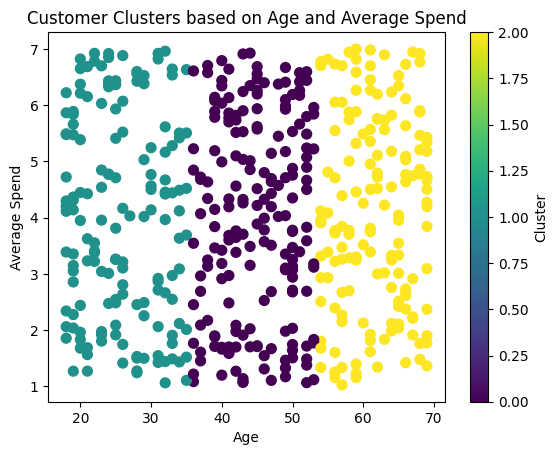

In [33]:
plt.scatter(df['Age'], df['Average_Spend'], c = df['Cluster'], cmap='viridis', marker='o', s = 50)
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Clusters based on Age and Average Spend')
plt.colorbar(label='Cluster')
plt.show()




 Evaluate the clustering performance

In [34]:
# Using silhouette score (measures how similar a point is to its own cluster compared to other clusters)
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.48


### save model for the future referance

In [36]:
import pickle

pickle.dump(kmeans,open("kmeans.pkl",'wb'))





In [37]:
kmeans = pickle.load(open("kmeans.pkl",'rb'))

### Predict the cluster of a new customer

In [38]:
# For a new customer with Age=40, Average_Spend=$30, Visits_per_Week=4, Promotion_Interest=7

def clustering(age,avg_spend,visit_per_week, promotion_interest):
    new_customer = np.array([[age,avg_spend,visit_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)

    if predicted_cluster[0]==0:
        return "Daily"
    elif predicted_cluster[0]==1:
        return "Weekend"
    else:
        return "Promotion"

In [39]:
# test 1
age = 40
avg_spend = 30
visit_per_week= 4
promotion_interest= 7


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Daily


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [40]:
# test 2
age = 60
avg_spend = 5
visit_per_week= 5
promotion_interest= 2


predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')

# Save the generated dataset as CSV
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Promotion


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
